In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [2]:
enfermedades = pd.read_excel('archivos/CIE.xlsx')
new_df=  pd.read_csv ('archivos/NewDataAll2.csv')

C:\Users\yeyoc\AppData\Local\Temp\ipykernel_22432\1745703392.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df=  pd.read_csv ('archivos/NewDataAll2.csv')


In [3]:
new_df

,Unnamed: 0,depreg,mupreg,mesreg,añoreg,depocu,mupocu,sexo,diaocu,mesocu,...,ecidif,dnadif,mnadif,nacdif,dredif,mredif,caudef,asist,ocur,cerdef
0,0,5,505,1,9,5,505,1,2,1,...,1,1,101,0,1,101,Y214,1,3,1
1,1,1,101,9,9,1,101,1,27,9,...,1,1,101,0,1,101,X919,4,3,1
2,2,22,2206,9,9,22,2206,2,23,8,...,1,1,101,0,1,101,X959,4,3,2
3,3,2,201,12,9,2,201,1,5,12,...,1,1,101,0,1,101,V899,4,3,1
4,4,1,101,5,9,1,101,2,7,5,...,2,1,101,0,1,101,X709,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953746,95996,9,901,4,2020,9,901,1,7,4,...,9,99,9999,9999,99,9999,R99X,1,1,1
953747,95997,10,1001,11,2020,10,1001,1,22,10,...,9,99,9999,9999,99,9999,J984,5,6,9
953748,95998,1,101,6,2020,1,101,1,27,6,...,9,99,9999,9999,99,9999,U071,1,1,1
953749,95999,9,901,2,2020,9,901,1,23,2,...,9,99,9999,9999,99,9999,K709,1,1,1


In [4]:
new_df['caudef']
enfermedades2 = enfermedades.copy()
enfermedades2.loc[enfermedades2['CAUSA'].str.len() == 3, 'CAUSA'] = enfermedades2.loc[enfermedades2['CAUSA'].str.len() == 3, 'CAUSA'] + "X"
enfermedades2

new_df2 = pd.merge(new_df, enfermedades2, left_on='caudef', right_on='CAUSA', how='left')

new_df2 = new_df2.dropna()
causas_infecciones = new_df2.loc[new_df2["DESCRIP"].str.contains("Infecciones|infecciones|infeccion|Infección|Infeccion|infección")]

causas_vih = new_df2.loc[new_df2["DESCRIP"].str.contains("VIH|vih|SIDA")]


In [5]:
new_df2['VIH'] = 0
indices_vih = new_df2[new_df2['DESCRIP'] .str.contains("VIH|vih|SIDA")].index
new_df2.loc[indices_vih, 'VIH'] = 1


In [6]:
new_df2.loc[new_df2["DESCRIP"].str.contains("VIH|vih|SIDA")]
new_df2

,Unnamed: 0,depreg,mupreg,mesreg,añoreg,depocu,mupocu,sexo,diaocu,mesocu,...,nacdif,dredif,mredif,caudef,asist,ocur,cerdef,CAUSA,DESCRIP,VIH
0,0,5,505,1,9,5,505,1,2,1,...,0,1,101,Y214,1,3,1,Y214,"Ahogamiento y sumersión, de intención no deter...",0
1,1,1,101,9,9,1,101,1,27,9,...,0,1,101,X919,4,3,1,X919,"Agresión por ahorcamiento, estrangulamiento y ...",0
2,2,22,2206,9,9,22,2206,2,23,8,...,0,1,101,X959,4,3,2,X959,"Agresión con disparo de otras armas de fuego, ...",0
3,3,2,201,12,9,2,201,1,5,12,...,0,1,101,V899,4,3,1,V899,Persona lesionada en accidente de vehículo no ...,0
4,4,1,101,5,9,1,101,2,7,5,...,0,1,101,X709,4,3,1,X709,Lesión autoinfligida intencionalmente por ahor...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953745,95995,5,501,12,2020,5,503,1,27,7,...,9999,99,9999,X480,9,6,9,X480,"Envenenamiento accidental por, y exposición a ...",0
953746,95996,9,901,4,2020,9,901,1,7,4,...,9999,99,9999,R99X,1,1,1,R99X,Otras causas mal definidas y las no especifica...,0
953747,95997,10,1001,11,2020,10,1001,1,22,10,...,9999,99,9999,J984,5,6,9,J984,Otros trastornos del pulmón,0
953749,95999,9,901,2,2020,9,901,1,23,2,...,9999,99,9999,K709,1,1,1,K709,"Enfermedad hepática alcohólica, no especificada",0


In [7]:
sample_size = 100000
new_df2 = new_df2.sample(n=sample_size, random_state=42)

[Text(0, 0, '99457'), Text(0, 0, '543')]

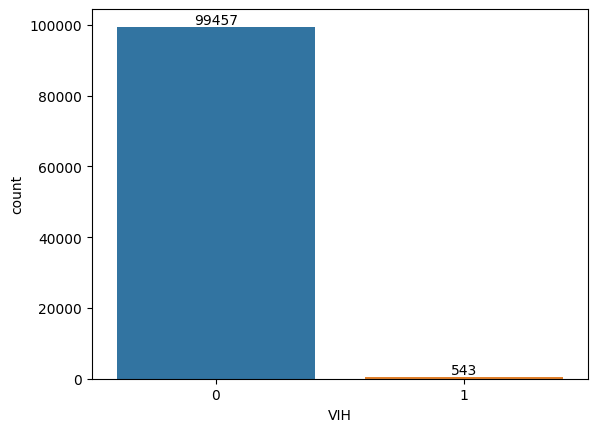

In [8]:
from seaborn import heatmap, countplot

hist = countplot(new_df2, x="VIH")
hist.bar_label(hist.containers[0])

In [9]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a pandas DataFrame called 'data' with the 'cause' column
encoder = LabelEncoder()
new_df2.pop('caudef')
new_df2.pop('CAUSA')
new_df2.pop('DESCRIP')

new_df2

,Unnamed: 0,depreg,mupreg,mesreg,añoreg,depocu,mupocu,sexo,diaocu,mesocu,...,ecidif,dnadif,mnadif,nacdif,dredif,mredif,asist,ocur,cerdef,VIH
841138,68988,5,501,10,2019,5,501,2,21,10,...,1,5,501,320,99,9999,1,1,1,0
555404,30616,1,101,9,2016,1,101,2,1,9,...,2,21,2107,320,1,108,1,1,1,0
893482,35732,22,2216,1,2020,22,2216,2,8,1,...,2,22,2216,320,22,2216,5,6,9,0
755682,66603,1,101,3,2018,1,101,1,8,3,...,1,12,1213,320,12,1213,1,4,1,0
596024,71236,1,101,9,2016,1,101,1,23,9,...,2,12,1202,320,12,1201,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794216,22066,22,2215,5,2019,22,2215,1,6,4,...,1,22,2215,320,22,2215,5,6,9,0
604147,79359,16,1601,1,2016,16,1601,1,25,1,...,2,16,1608,320,16,1601,1,6,1,0
653057,45704,12,1203,2,2017,12,1203,1,15,2,...,2,12,1203,320,12,1203,5,6,9,0
612827,5474,17,1705,5,2017,17,1705,1,5,5,...,1,18,1802,320,17,1705,5,6,1,0


In [10]:
import pandas as pd
#import numpy as np

# Iterate over each column and replace non-numeric values with 0
for column in new_df2.columns:
    new_df2[column] = pd.to_numeric(new_df2[column], errors='coerce').fillna(0)

# Continue with your data analysis using the modified dataframe


In [11]:
# Filtrar las características y la variable objetivo
#X = new_df2[['Depreg', 'Mupreg', 'Mesreg', 'Añoreg', 'Depocu', 'Mupocu', 'Sexo', 'Diaocu', 'Mesocu', 'Añoocu', 'Edadif', 'Perdif', 'Ecidif', 'Dnadif', 'Nacdif', 'Dredif', 'Mredif', 'Asist', 'Ocur', 'Cerdef']]
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

X = new_df2.drop('VIH', axis=1)
y = new_df2["VIH"]


#X = new_df2[['Edadif']]
#y = new_df2['VIH']
# Balancear las clases utilizando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)




In [12]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

# Crear una instancia del modelo SVM y entrenarlo con diferentes parámetros
linReg = LinearRegression()
linReg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = linReg.predict(X_test)

print("RMSE:", ((metrics.mean_squared_error(y_test, y_pred))**0.5))
print("R2:", (metrics.r2_score(y_test, y_pred)))

RMSE: 0.32368031690366644
R2: 0.5809231588522636


In [13]:
scores = cross_val_score(linReg, X, y, cv = 5, scoring='neg_mean_squared_error')

print("Cross Validation Scores: ", -scores)
print("Average CV Score: ", -scores.mean())

Cross Validation Scores:  [0.00508474 0.00483354 0.00575663 0.00516855 0.00590082]
Average CV Score:  0.005348856389768124


In [14]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

# Crear una instancia del modelo SVM y entrenarlo con diferentes parámetros
logReg1 = LogisticRegression(solver='liblinear')
logReg1.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logReg1.predict(X_test)

cm = metrics.confusion_matrix(y_test,y_pred)

print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precission:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

# Calcular la precisión (accuracy), sensibilidad (sensitivity) y especificidad (specificity)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

true_negative = confusion[0, 0]
false_positive = confusion[0, 1]
false_negative = confusion[1, 0]
true_positive = confusion[1, 1]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

# Imprimir los resultados
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Confussion Matrix
[[16760  3100]
 [ 2531 17392]] 

Accuracy: 0.8584571299298696
Precission: 0.8587442897757125
Recall:  0.8584571299298696
F1 Score:  0.8584249613491834
Sensitivity: 0.8729608994629323
Specificity: 0.8439073514602216


In [15]:
scores = cross_val_score(logReg1, X, y, cv = 5, scoring='accuracy')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.9946  0.9946  0.99455 0.99455 0.99455]
Average CV Score:  0.9945700000000001


In [16]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

# Crear una instancia del modelo SVM y entrenarlo con diferentes parámetros
logReg2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=100)
logReg2.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logReg2.predict(X_test)

cm = metrics.confusion_matrix(y_test,y_pred)

print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precission:", metrics.precision_score(y_test,y_pred, zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred, zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred))

# Calcular la precisión (accuracy), sensibilidad (sensitivity) y especificidad (specificity)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

true_negative = confusion[0, 0]
false_positive = confusion[0, 1]
false_negative = confusion[1, 0]
true_positive = confusion[1, 1]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

# Imprimir los resultados
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Confussion Matrix
[[12816  7044]
 [ 6717 13206]] 

Accuracy: 0.6540984842772039
Precission: 0.6521481481481481
Recall:  0.6628519801234753
F1 Score:  0.6574565006347547
Sensitivity: 0.6628519801234753
Specificity: 0.6453172205438067


c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
scores = cross_val_score(logReg2, X, y, cv = 5, scoring='accuracy')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross Validation Scores:  [0.9946  0.9946  0.99455 0.99455 0.99455]
Average CV Score:  0.9945700000000001


c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

# Crear una instancia del modelo SVM y entrenarlo con diferentes parámetros
logReg3 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
logReg3.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logReg3.predict(X_test)

cm = metrics.confusion_matrix(y_test,y_pred)

print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precission:", metrics.precision_score(y_test,y_pred, zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred, zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred))

# Calcular la precisión (accuracy), sensibilidad (sensitivity) y especificidad (specificity)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

true_negative = confusion[0, 0]
false_positive = confusion[0, 1]
false_negative = confusion[1, 0]
true_positive = confusion[1, 1]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

# Imprimir los resultados
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Confussion Matrix
[[14528  5332]
 [ 4165 15758]] 

Accuracy: 0.7612799436945429
Precission: 0.7471787577050735
Recall:  0.7909451387843196
F1 Score:  0.7684392753517177
Sensitivity: 0.7909451387843196
Specificity: 0.731520644511581


c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
scores = cross_val_score(logReg3, X, y, cv = 5, scoring='accuracy')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross Validation Scores:  [0.9946  0.9946  0.99455 0.99455 0.99455]
Average CV Score:  0.9945700000000001


In [20]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


# Crear una instancia del modelo SVM y entrenarlo con diferentes parámetros
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rfr.predict(X_test)

In [21]:
print("RMSE:", ((metrics.mean_squared_error(y_test, y_pred))**0.5))
print("R2:", (metrics.r2_score(y_test, y_pred)))

RMSE: 0.08408163137681919
R2: 0.9717210461432103


In [22]:
scores = cross_val_score(rfr, X, y, cv = 5, scoring='neg_mean_squared_error')

print("Cross Validation Scores: ", -scores)
print("Average CV Score: ", -scores.mean())

Cross Validation Scores:  [0.00471483 0.00437516 0.00530479 0.0048398  0.00527439]
Average CV Score:  0.004901793999999999


In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

In [24]:
cm = metrics.confusion_matrix(y_test,y_pred)

print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precission:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

# Calcular la precisión (accuracy), sensibilidad (sensitivity) y especificidad (specificity)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

true_negative = confusion[0, 0]
false_positive = confusion[0, 1]
false_negative = confusion[1, 0]
true_positive = confusion[1, 1]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

# Imprimir los resultados
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Confussion Matrix
[[19703   157]
 [   55 19868]] 

Accuracy: 0.9946710906668678
Precission: 0.9946840551178523
Recall:  0.9946710906668678
F1 Score:  0.9946710339992628
Sensitivity: 0.9972393715805853
Specificity: 0.9920946626384692


In [25]:
scores = cross_val_score(rf, X, y, cv = 5, scoring='accuracy')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.99465 0.9946  0.99455 0.9946  0.99455]
Average CV Score:  0.9945900000000002
